In [7]:
import pandas as pd
import numpy as np
import sklearn.linear_model as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
dt = pd.read_excel(r'BloodPressureData.xlsx')
# 250, 5 dimension
original_column_names = dt.columns.tolist()
new_column_names = ['age', 'sex', 'initial_bp', 'drug_dosage', 'systolic_bp_after_treatment']
rename_dict = {original: new for original, new in zip(original_column_names, new_column_names)}
dt = dt.rename(columns=rename_dict)
dt['sex'] = dt['sex'].astype('category')


In [31]:
dt

X = dt[['initial_bp', 'drug_dosage']]
y = dt['systolic_bp_after_treatment']

In [32]:
#using normal equation 

X_m = X.to_numpy()
y_m = y.to_numpy()

In [33]:
ones_column = np.ones((X_m.shape[0], 1))
X_m = np.hstack((ones_column, X_m))


using normal equation

In [34]:
X_t = X_m.transpose()

theta = np.linalg.inv(X_t.dot(X_m)).dot(X_t).dot(y_m)
theta

array([-1.73561778,  1.02320923, -3.05954588])

In [35]:

model  = sk.LinearRegression()
model.fit(X.to_numpy(),y.ravel())
model.intercept_, model.coef_


(-1.7356177841251395, array([ 1.02320923, -3.05954588]))

statsmodel 

In [36]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
X = dt[['initial_bp', 'drug_dosage','age']]
y = dt['systolic_bp_after_treatment']
print(X.corr())
X = sm.add_constant(X)


             initial_bp  drug_dosage       age
initial_bp     1.000000    -0.107822 -0.040146
drug_dosage   -0.107822     1.000000 -0.005455
age           -0.040146    -0.005455  1.000000


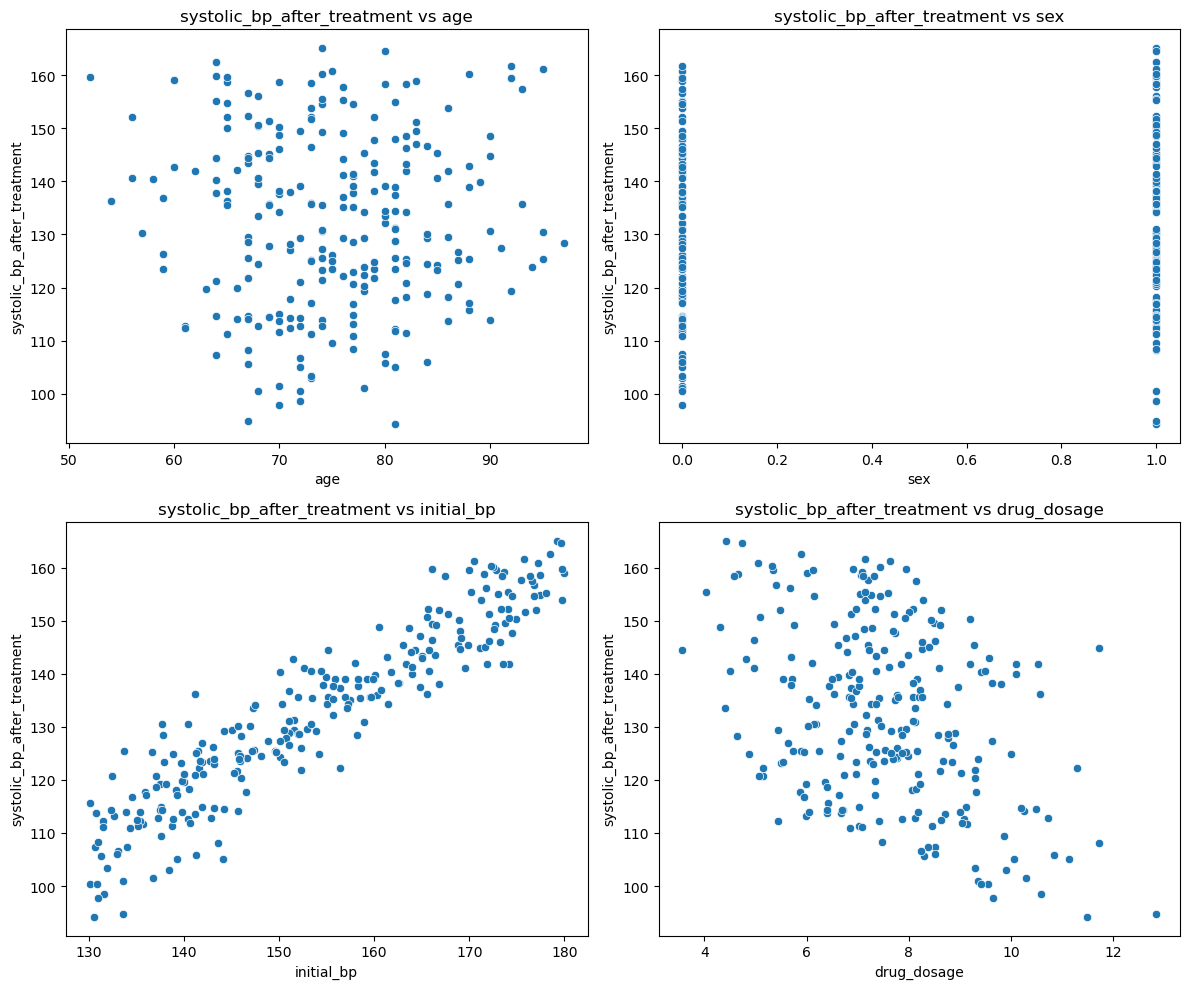

In [44]:
x_cols_order = ['age', 'sex', 'initial_bp', 'drug_dosage']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Convert the 2x2 axes grid into a 1D list to easily loop through

# Plotting
for i, col in enumerate(x_cols_order):  # Using the ordered list
    sns.scatterplot(data=dt, x=col, y='systolic_bp_after_treatment', ax=axes[i])
    axes[i].set_title(f"systolic_bp_after_treatment vs {col}")

plt.tight_layout()
plt.show()

In [60]:
model = sm.OLS(y, X).fit()
rmse = np.sqrt(((y - model.predict(X)) ** 2).mean())

print("RMSE:", rmse)
print(model.summary())

RMSE: 3.5838766842379766
                                 OLS Regression Results                                
Dep. Variable:     systolic_bp_after_treatment   R-squared:                       0.953
Model:                                     OLS   Adj. R-squared:                  0.953
Method:                          Least Squares   F-statistic:                     2498.
Date:                         Tue, 19 Sep 2023   Prob (F-statistic):          1.36e-164
Time:                                 16:29:25   Log-Likelihood:                -673.85
No. Observations:                          250   AIC:                             1354.
Df Residuals:                              247   BIC:                             1364.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------

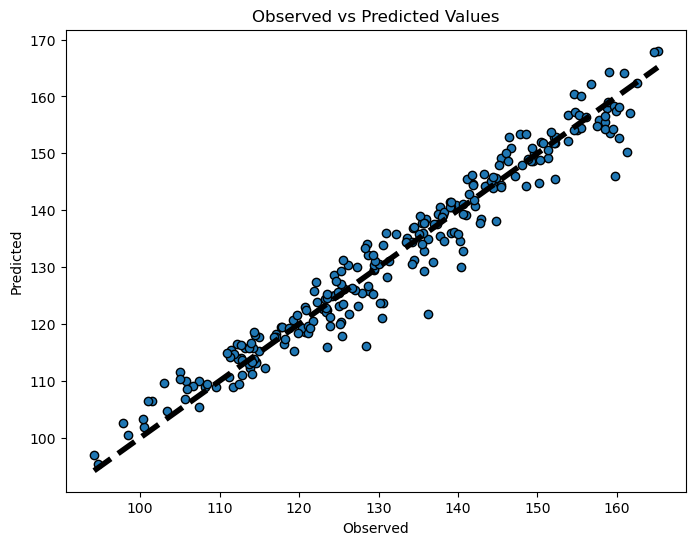

In [56]:

predicted_values = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values')
plt.show()


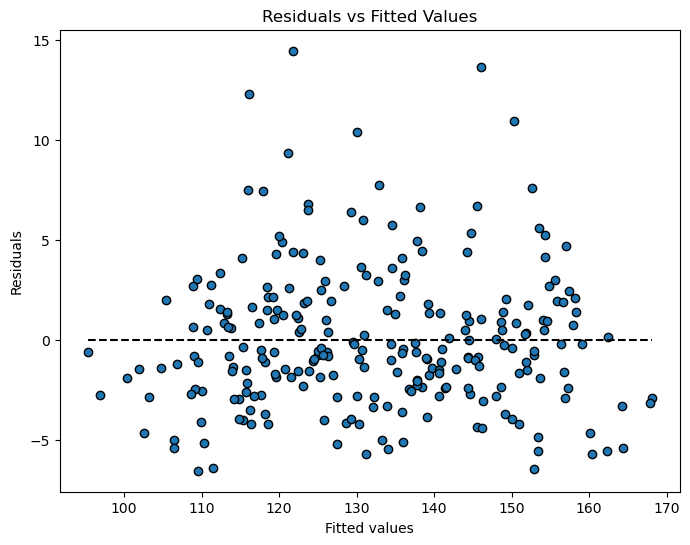

In [57]:
residuals = y - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, edgecolor='k')
plt.hlines(0, predicted_values.min(), predicted_values.max(), colors='k', linestyles='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


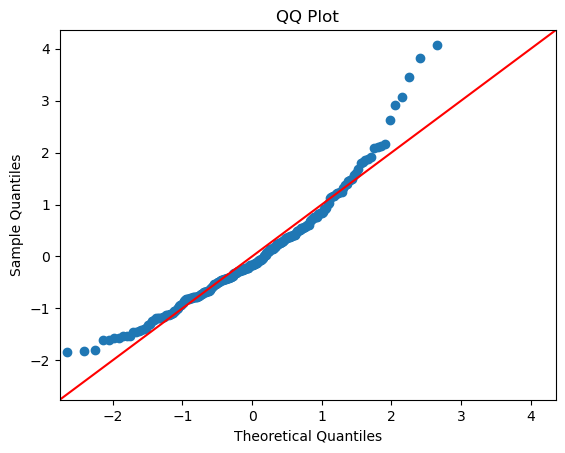

In [58]:
residuals = y - predicted_values
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

batch gd

In [22]:
eta = 0.1 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) 
for iteration in range(n_iterations):
 gradients = 2/m * X_m.T.dot(X_m.dot(theta) - y)
 theta = theta - eta * gradients

NameError: name 'X_m' is not defined